## RAG Using Langchain with Ollama

This code file contains a simple starter notebook for the HelpMate AI project and used the option to build and improve HelpMate Retrival Augmented Generation system.



**Problem Statement:**

The goal of the project is to build a RAG system using frameworks such as LangChain with Ollama for a document in Insurance domain.



**RAG - System Architecture**

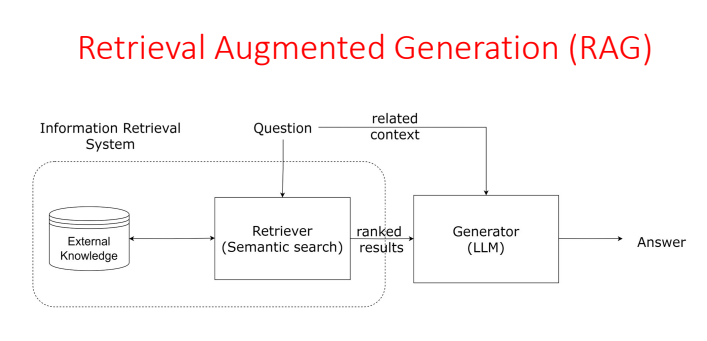

**About RAG:**

Retrieval-Augmented Generation (RAG) using LangChain and OLAMA (OpenAI Large Language Model API) involves combining the power of LangChain for orchestration with the generative capabilities of OLAMA to create a pipeline that retrieves relevant knowledge and generates accurate, context-aware responses. It has two phases. They are:

Retrieval Phase: When a query is submitted, the model retrieves relevant documents, knowledge, or information from an external knowledge base, such as a database, search engine, or document repository.

Augmented Generation: The retrieved information is then passed to a generative language model (like GPT) as context. The language model generates a response by combining the retrieved data with its inherent generative capabilities.

**Here is how we have implemented the RAG with the following tools:**

- LangChain -- A framework for building applications with LLMs that enables chaining tasks, retrieval, and external data integrations.

- Ollama (Version-3.2) -- The OpenAI LLM API to generate responses using GPT models.

- Embeddings (HuggingFace)

- Vector Database (FAISS)

**The flow of the RAG implementation:**

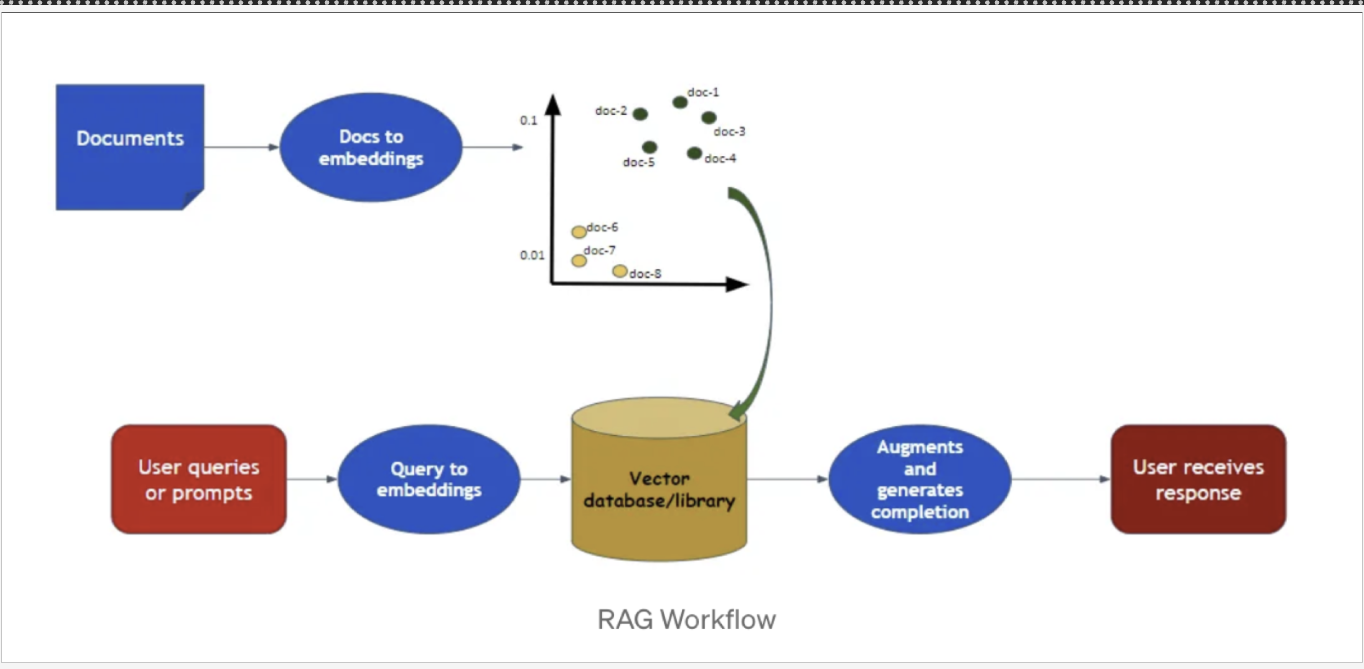

### Installation of packages
Install the required packages for building the RAG using Langchain with Ollama

In [1]:
!pip install langchain_chroma
!pip install langchain_community --quiet
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.6/166.6 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 940.1 kB/s et

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 842.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 72.8 MB/s eta 0:00:00


In [2]:
!pip install sentence-transformers
!pip install faiss-cpu
!pip install faiss-gpu
!pip install ollama

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

### Importing the libraries

In [3]:
#Import libraries

#To read the documents
from langchain_community.document_loaders import PDFPlumberLoader

#Splits the text into chunks
from langchain_text_splitters import RecursiveCharacterTextSplitter

#To store embeddings of data.
from langchain_community.vectorstores import FAISS

#To create embeddings to convert text into numerical vectors
from langchain.embeddings import HuggingFaceEmbeddings

#To fetch the data from embeddings
from langchain.chains import RetrievalQA

#To import Ollama
from langchain_community.llms import Ollama
from langchain.llms import ollama

### Executing the collab-xterm

In [4]:
#Inorder to run Ollama in collab, we need to install it using the following command
!pip install colab-xterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 3.6 MB/s eta 0:00:00


Once the collab-xterm is installed, Run the following commands to launch the xterm using these commands: :
- %load_ext colabxterm
- %xterm

After launching the x-term, Run the following commands in the terminal to download the llama 3.2 version:

- curl https://ollama.ai/install.sh | sh

- ollama serve &

- ollama run llama3.2

In [5]:
#Launching the collab-xterm and downloading the llama3.2 version
%load_ext colabxterm
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [6]:
#Checking the version of ollama
#import ollama
!ollama list

NAME               ID              SIZE      MODIFIED      
llama3.2:latest    a80c4f17acd5    2.0 GB    6 seconds ago    


### RAG Building

#### 1. Loading the Document using PDFPlumberLoader

In [7]:
# Read the PDF file and extract text from its pages
file_path = "/content/HDFC-Life-Group-Term-Life-Policy.pdf"

In [8]:
# Load the PDF file using PDFPlumberLoader
loader = PDFPlumberLoader(file_path)
docs = loader.load()

#### 2. Split the PDF into manageble chunks

In [9]:
# Split the loaded document into manageable chunks
text_splitter = RecursiveCharacterTextSplitter(
                                      chunk_size=1000,
                                      chunk_overlap=200)
text_chunks = text_splitter.split_documents(docs)

#### 3. Generate Embeddings and Create FAISS Vector Store

In [11]:
# Use Hugging Face Embeddings for generating vector representations of the text
embeddings = HuggingFaceEmbeddings()
knowledge_base = FAISS.from_documents(text_chunks, embeddings)

<ipython-input-11-e9c47f1004bb>:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings()
<ipython-input-11-e9c47f1004bb>:2: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embeddings = HuggingFaceEmbeddings()
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggin

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### 4. Initialize the Retriever

In [12]:
# Convert the FAISS vector store into a retriever
ret = knowledge_base.as_retriever()

#### 5. Set Up the RAG Pipeline

In [13]:
# loading the LLM with the model llama3.2
llm = Ollama(
    model="llama3.2",
    temperature=0
)

<ipython-input-13-646208e79ca0>:2: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(


In [14]:
# retrieval QA chain
# Use an Ollama LLM (like GPT-4) for generation
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=ret)

#### 6. Query the System

In [ ]:
# Pass a question to the RAG pipeline
question = "What happens in case of accidental death?"
response = qa_chain.invoke({"query": question})
print(response["result"])

Based on the provided context, here are the key points related to accidental death:

* If an Insured Member dies due to Accidental Death during the Policy Year, the amount specified in the Coverage Schedule as the Additional Sum Assured (if opted by the Policyholder) shall become payable to the Beneficiary of the Insured Member.
* The maximum Benefit payable by the Company on Accidental Death of an Insured Member under all policies put together issued by the Company is limited to a total of Rs.10,000,000/- (Rupees 1 crore only).
* If there is an optional accidental death cover, exclusions apply, including:
 + Death caused by an accident occurring directly or indirectly as a result of disease or infection.
 + Intentional self-inflicted injury, suicide, or attempted suicide while sane or insane.
 + Life assured being under the influence of drugs, alcohol, narcotics, or psychotropic substances unless specified otherwise.

It appears that accidental death is covered under the policy, but w

In [ ]:
# Pass a question to the RAG pipeline
question = "What all information is listed in a policy schedule?"
response = qa_chain.invoke({"query": question})
print(response["result"])

Based on the provided context, it appears that a Policy Schedule contains the following information:

1. Policy No.
2. Policy Commencement Date
3. Name & Address of Policyholder
4. Risk Commencement Date/Date at inception
5. Risk Commencement date for new members (first day of the calendar month)
6. Date of Joining the Group
7. Date of intimation
8. Frequency of Premium Payment (Monthly, Quarterly, Half-Yearly, Yearly)
9. Premium Due Date (specific dates for each frequency)
10. Cover Cessation Date
11. Policy Renewal Date
12. Grace Period Expiry Date
13. Nature of Business
14. Benefit Expiry Age
15. Insured Members (as per the Coverage Schedule)
16. Sum Assured (as mentioned in the policy documents/Certificate of Insurance/Coverage schedule)
17. Special Policy Conditions, if any

Please note that this information is based on the provided context and may not be an exhaustive list of all possible details included in a Policy Schedule.


In [ ]:
# Pass a question to the RAG pipeline
question = "Who is an active member?"
response = qa_chain.invoke({"query": question})
print(response["result"])

An Active Member is defined as an individual who is a member of the organization, participates in its day-to-day activities, holds some sort of basic position or qualification as defined by the organization under its eligibility criteria, and meets all the obligations and conditions required to be an active member. They must also be actively working on the Risk commencement date. This definition applies specifically to Employer-Employee relationships.


In [ ]:
# Pass a question to the RAG pipeline
question = "What is Free Look Provisions?"
response = qa_chain.invoke({"query": question})
print(response["result"])

The "Free Look Provisions" refer to the period of time (15 days for Master Policyholders and 30 days for those sourced through Direct Sales) during which the Master Policyholder can review the terms and conditions of the policy and cancel it if they disagree, with the company refunding the premium paid subject to certain deductions.


In [ ]:
# Pass a question to the RAG pipeline
question = "Define Affinity Groups?"
response = qa_chain.invoke({"query": question})
print(response["result"])

According to the provided context, an Affinity Group is defined as a group consisting of persons who assemble together with a commonality of purpose or engaging in a common economic activity.
